In sklearn, different machine learning models are represented as classes.  Below, we see a LogisticRegression classifier imported to use at our disposal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns # imports seaborn class as an alias 'sns'; 
import sklearn.datasets # imports 'classical' machine learning datasets
from sklearn.linear_model import LogisticRegression # imports LogisticRegression class
from sklearn.decomposition import PCA # imports the PCA class, allowing us to reduce the dimensionality of our data
from sklearn.model_selection import train_test_split # imports the function train_test_split,
                                                    # which allows us to easily split our X and y into training and testing sets

The [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is built into sklearn and can be loaded with the function `sklearn.datasets.load_iris()`.  However, `load_iris()` returns a dictionary, which contains both our input, `X`, and our target output, `y`, with the keys `'data'` and `'target'`, respectively.

In [4]:
iris_data = sklearn.datasets.load_iris()  # loads in the Iris dataset through sklearn.datasets
X = iris_data['data']  # gets the input values, our input X, from iris_data
y = iris_data['target'] # gets the target values, our output y, from iris_data

Note in the output of the cell below that X has 150 rows and 4 columns, while y is a 1D array with 150 values.

In [5]:
print(type(iris_data)) # prints the type of iris_data, which says 'sklearn.utils.Bunch', 
                       # but is very similar to a Python dictionary
print(X.shape) # prints the shape of X
print(y.shape) # prints the shape of y

<class 'sklearn.utils.Bunch'>
(150, 4)
(150,)


This dataset is commonly used in classification tasks as there are three different classes: Iris Setosa, Iris Versicolour, and Iris Virginica.

We have 4 different 'features' or dimensions in our dataset: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm.

We'd like to visualize these 4 features to get an intuition for the differences between the classes.  However, we cannot see past 3 dimensions, so we will have to reduce the dimensionality of our dataset.  To do this we use Principal Component Analysis or PCA to reduce our dimensions from 4 to 2.

In [14]:
pca = PCA(n_components=2)  # initialize a PCA class to reduce our data to 2 dimensions, which is n_components

In [15]:
X.shape

(150, 4)

In [16]:
X_pca = pca.fit_transform(X)  # we fit PCA to our dataset X and transform X from 4 dimensions to 2

In [17]:
print(X.shape) # the shape of our original dataset (150 rows, 4 columns)
print(X_pca.shape) # the shape of our PCA-transformed dataset (150 rows, 2 columns)

(150, 4)
(150, 2)


In [18]:
iris_df = pd.DataFrame(np.insert(X_pca, 2, y, axis=1), columns=['feat_1', 'feat_2', 'class'])

In [19]:
iris_df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

In [21]:
iris_df

,feat_1,feat_2,class
0,-2.684126,0.319397,0.0
1,-2.714142,-0.177001,0.0
2,-2.888991,-0.144949,0.0
3,-2.745343,-0.318299,0.0
4,-2.728717,0.326755,0.0
...,...,...,...
145,1.944110,0.187532,2.0
146,1.527167,-0.375317,2.0
147,1.764346,0.078859,2.0
148,1.900942,0.116628,2.0


<AxesSubplot:xlabel='feat_1', ylabel='feat_2'>

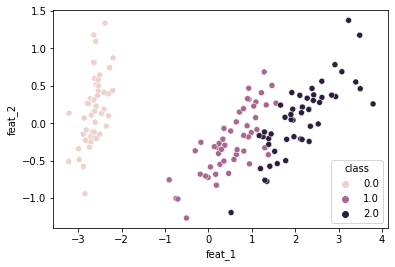

In [20]:
sns.scatterplot(data=iris_df, x='feat_1', y='feat_2', hue='class')

Before training our model, we will split our model into a training set and testing set, so that we can check the accuracy of our model on unseen data.

In [22]:
train_test_split?

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # splits our X and y into train and test sets,
                                                                         # with the testing data being 30% of the size 
                                                                         # of the training set

In [26]:
clf = LogisticRegression()  # initializes a LogisticRegression class,
                           # which will allow us to train and test a Logistic Regression model

`clf.fit(X, y)` will train our LogisticRegression classifier to our training dataset.  
In other words, the `fit` function updates our LogisticRegression object with the set of parameters W and bias vector B needed to make predictions.

In [27]:
clf.fit(X_train, y_train) # fits or trains our LogisticRegression model on our training data

LogisticRegression()

Once we fit our model, we have a set of weights and biases that we then apply to our test data to measure the accuracy of our model.

In [30]:
y_pred = clf.predict(X_test)  # predicts the y_test values based on our trained model and given inputs X_test
y_pred[:5] # outputs our first 5 predictions (our output is either class 0, 1, or 2)

array([2, 2, 1, 0, 1])

To evaluate our model's accuracy, we will see how many values from `y_pred` are equal to `y_test`, divided by the length of either array.

In [31]:
sum(y_pred == y_test) / len(y_pred)  # gets the accuracy of our model by summing all the times y_pred equals y_test 
                                     # divided by the length of y_pred

0.9777777777777777